# Import all the Dependencies

In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# Import data into tensorflow dataset object 

Used splitfolders tool to split dataset into training, validation and test directories.
1. pip install split-folders
2. split_folders --output dataset --ratio .7 .1 .2 -- PlantVillage

In [4]:
IMAGE_SIZE = 256
CHANNELS = 3

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1506 images belonging to 3 classes.


In [6]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [7]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

# ImageDataGenerator

In [8]:
import scipy
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.70191    0.6940742  0.7450183 ]
  [0.6744943  0.67057276 0.70193607]
  [0.6549073  0.6509857  0.6705967 ]
  ...
  [0.6680813  0.652395   0.70729697]
  [0.6673595  0.6516732  0.70657516]
  [0.66667396 0.6509877  0.70588964]]

 [[0.7035196  0.69567645 0.74683005]
  [0.67575127 0.6716524  0.70391166]
  [0.6558095  0.65188795 0.6720403 ]
  ...
  [0.6702305  0.65454423 0.7094462 ]
  [0.67041093 0.65472466 0.7096266 ]
  [0.67060065 0.6549144  0.70981634]]

 [[0.7051436  0.69730043 0.74863446]
  [0.67701435 0.67273504 0.70589656]
  [0.65671176 0.6527902  0.67348385]
  ...
  [0.68482673 0.66914046 0.7240425 ]
  [0.68554854 0.6698623  0.7247642 ]
  [0.68627036 0.6705841  0.72548604]]

 ...

 [[0.3882469  0.37256062 0.42746258]
  [0.39023182 0.37454554 0.4294475 ]
  [0.39221674 0.37653047 0.43143246]
  ...
  [0.5240424  0.5044346  0.53188556]
  [0.50694156 0.48733374 0.5147847 ]
  [0.48161417 0.46200633 0.4894573 ]]

 [[0.43133846 0.4156522  0.47055414]
  [0.43385544 0.41816917 0.47307113]


In [9]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [10]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


# Building the Model

In [11]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

# Compiling the Model

We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [15]:
1506/32

47.0625

In [16]:
215/32

6.71875

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 237s 5s/step - loss: 0.9148 - accuracy: 0.4878 - val_loss: 0.8660 - val_accuracy: 0.4792
Epoch 2/20
47/47 [==============================] - 201s 4s/step - loss: 0.7338 - accuracy: 0.6445 - val_loss: 0.5485 - val_accuracy: 0.7604
Epoch 3/20
47/47 [==============================] - 237s 5s/step - loss: 0.5001 - accuracy: 0.7897 - val_loss: 0.4943 - val_accuracy: 0.7604
Epoch 4/20
47/47 [==============================] - 149s 3s/step - loss: 0.4147 - accuracy: 0.8256 - val_loss: 0.3681 - val_accuracy: 0.8490
Epoch 5/20
47/47 [==============================] - 164s 3s/step - loss: 0.3361 - accuracy: 0.8610 - val_loss: 0.3552 - val_accuracy: 0.8594
Epoch 6/20
47/47 [==============================] - 178s 4s/step - loss: 0.2927 - accuracy: 0.8901 - val_loss: 0.3016 - val_accuracy: 0.8906
Epoch 7/20
47/47 [==============================] - 192s 4s/step - loss: 0.2926 - accuracy: 0.8779 - val_loss: 0.2829 - val_accuracy: 0.8698
Epoch 8/20
47

In [18]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 33s 2s/step - loss: 0.3878 - accuracy: 0.8561


In [19]:
scores

[0.38778775930404663, 0.8561484813690186]

Scores is just a list containing loss and accuracy value

# Plotting the Accuracy and Loss Curves

In [20]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [21]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch

In [23]:
type(history.history['loss'])

list

In [24]:
len(history.history['loss'])

20

In [25]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9147707223892212,
 0.7337837815284729,
 0.5000520944595337,
 0.4146697521209717,
 0.3361010253429413]

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [27]:
val_acc

[0.4791666567325592,
 0.7604166865348816,
 0.7604166865348816,
 0.8489583134651184,
 0.859375,
 0.890625,
 0.8697916865348816,
 0.9166666865348816,
 0.9270833134651184,
 0.9375,
 0.96875,
 0.9375,
 0.8854166865348816,
 0.9166666865348816,
 0.9427083134651184,
 0.9739583134651184,
 0.984375,
 0.9635416865348816,
 0.9739583134651184,
 0.8854166865348816]

In [28]:
acc

[0.4877883195877075,
 0.644504725933075,
 0.7896879315376282,
 0.8256444931030273,
 0.8610372543334961,
 0.8900949954986572,
 0.8778833150863647,
 0.9124830365180969,
 0.9382632374763489,
 0.9545454382896423,
 0.9538670182228088,
 0.9375848174095154,
 0.9531885981559753,
 0.9511533379554749,
 0.9762550592422485,
 0.9450474977493286,
 0.9816824793815613,
 0.9850746393203735,
 0.9891451597213745,
 0.9776119589805603]

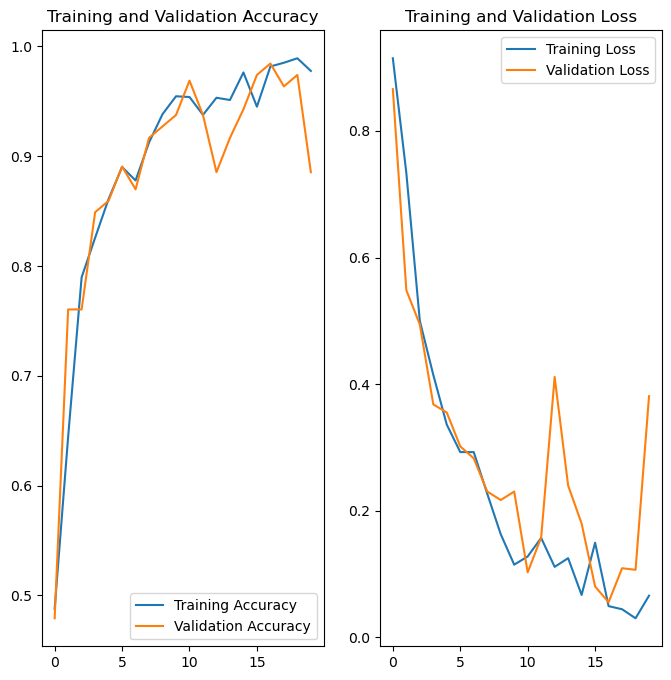

In [29]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Run prediction on a sample image

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 846ms/step
predicted label: Potato___Late_blight


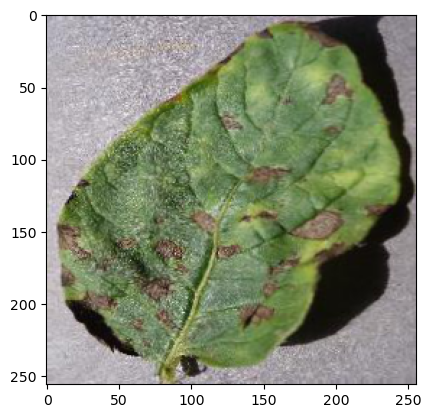

In [33]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

# Write a function for inference

In [34]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

# Now run inference on few sample images

1/1 [==============================] - 0s 48ms/step


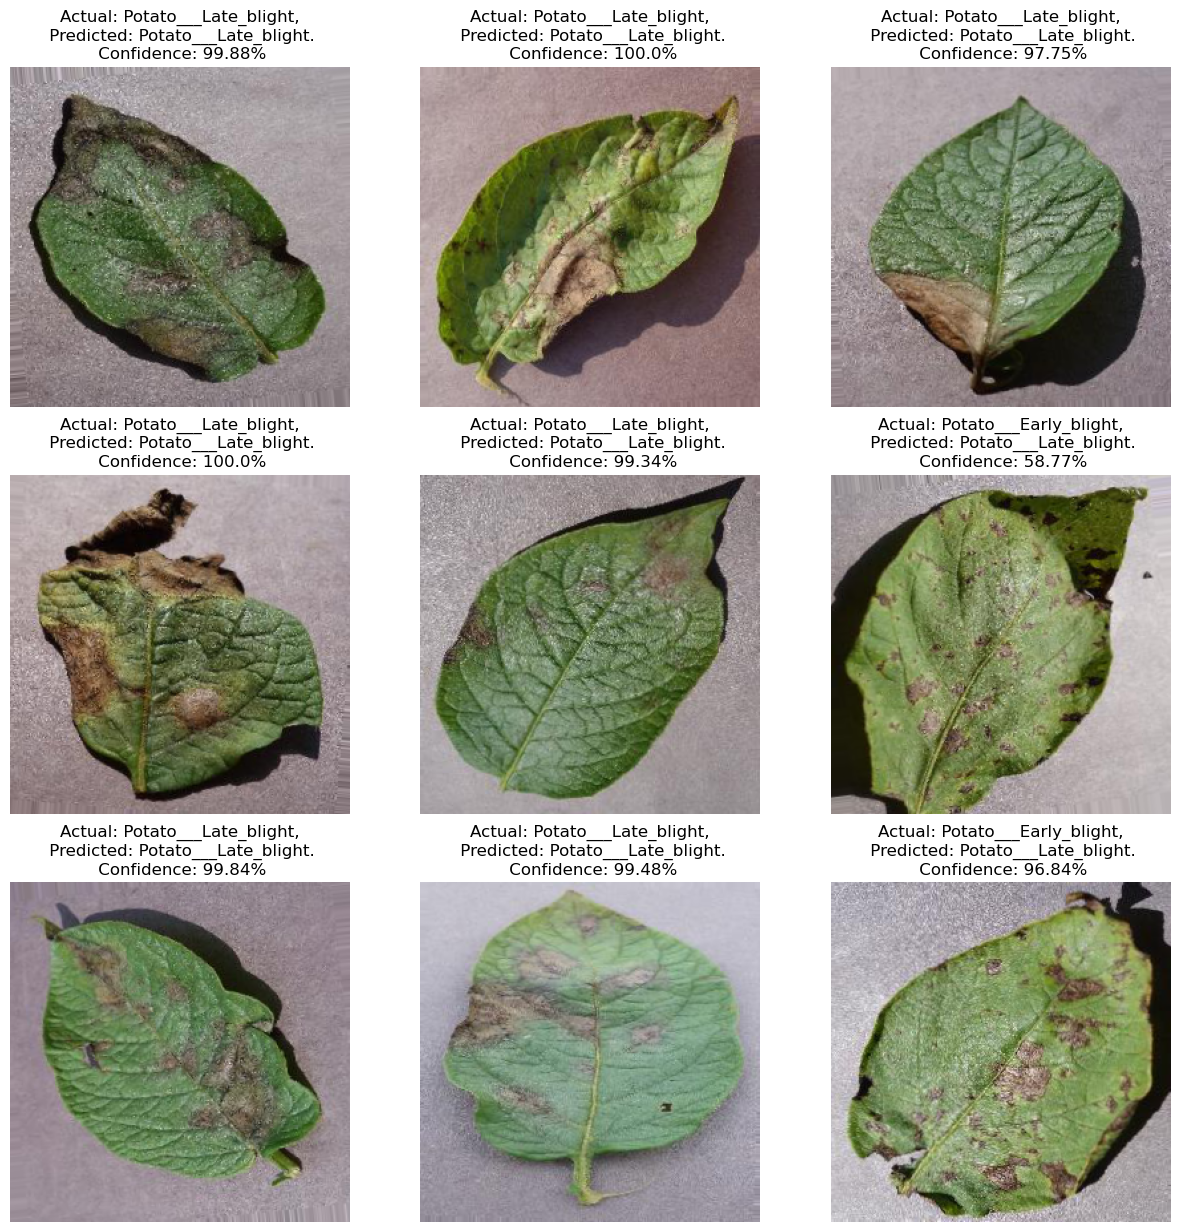

In [35]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

# Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [36]:
model.save("../potatoes.h5")

C:\Users\DELL\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
